# Imports

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Loaading

In [2]:
df=pd.read_csv('/content/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1001305,0,2,"Name1001305, Mr. Surname1001305",male,27.0,0,0,244358,26.196512,NaN,S
999996,1001306,1,1,"Name1001306, Miss. Surname1001306",female,33.0,0,0,349221,102.555248,NaN,S
999997,1001307,0,3,"Name1001307, Mr. Surname1001307",male,NaN,1,0,PC 17601,8.274807,NaN,S
999998,1001308,0,2,"Name1001308, Mr. Surname1001308",male,35.0,1,0,112050,0.000000,B102,S


# Data Analysis and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PassengerId  1000000 non-null  int64  
 1   Survived     1000000 non-null  int64  
 2   Pclass       1000000 non-null  int64  
 3   Name         1000000 non-null  object 
 4   Sex          1000000 non-null  object 
 5   Age          801400 non-null   float64
 6   SibSp        1000000 non-null  int64  
 7   Parch        1000000 non-null  int64  
 8   Ticket       1000000 non-null  object 
 9   Fare         1000000 non-null  float64
 10  Cabin        229805 non-null   object 
 11  Embarked     997760 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 91.6+ MB


In [4]:
df['Embarked'].unique()

array(['C', 'S', 'Q', nan], dtype=object)

In [5]:
df['Embarked']=df['Embarked'].map({'C':0,'S':1,'Q':2})
df['Embarked'].unique()

array([ 0.,  1.,  2., nan])

In [6]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Sex'].unique()

array([1, 0])

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,198600
SibSp,0
Parch,0
Ticket,0
Fare,0


**Dropping unnecesary columns**

In [8]:
df.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PassengerId  1000000 non-null  int64  
 1   Survived     1000000 non-null  int64  
 2   Pclass       1000000 non-null  int64  
 3   Sex          1000000 non-null  int64  
 4   Age          801400 non-null   float64
 5   SibSp        1000000 non-null  int64  
 6   Parch        1000000 non-null  int64  
 7   Fare         1000000 non-null  float64
 8   Embarked     997760 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 68.7 MB


In [9]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1310,1,1,1,NaN,0,0,76.760165,0.0
1,1311,0,3,0,29.0,0,0,10.193097,1.0
2,1312,0,3,0,20.0,0,0,12.029416,0.0
3,1313,0,3,0,27.0,0,0,13.429448,1.0
4,1314,0,3,0,32.0,0,0,4.840769,0.0
...,...,...,...,...,...,...,...,...,...
999995,1001305,0,2,0,27.0,0,0,26.196512,1.0
999996,1001306,1,1,1,33.0,0,0,102.555248,1.0
999997,1001307,0,3,0,NaN,1,0,8.274807,1.0
999998,1001308,0,2,0,35.0,1,0,0.000000,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   PassengerId  1000000 non-null  int64  
 1   Survived     1000000 non-null  int64  
 2   Pclass       1000000 non-null  int64  
 3   Sex          1000000 non-null  int64  
 4   Age          801400 non-null   float64
 5   SibSp        1000000 non-null  int64  
 6   Parch        1000000 non-null  int64  
 7   Fare         1000000 non-null  float64
 8   Embarked     997760 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 68.7 MB


In [11]:
df['Survived'].value_counts()

,count
Survived,
0,618319
1,381681


In [12]:
df.skew()

,0
PassengerId,-2.511790e-15
Survived,4.871117e-01
Pclass,-6.357343e-01
Sex,6.236328e-01
Age,1.781473e-01
SibSp,3.793246e+00
Parch,2.766727e+00
Fare,3.091319e+00
Embarked,-1.740902e-01


In [13]:
for i in df.columns:
  if abs(df[i].skew())>1:
    df[i].fillna(df[i].mean(),inplace=True)
  else:
    df[i].fillna(df[i].median(),inplace=True)

In [14]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [15]:
y=df['Survived']
x=df.drop('Survived',axis=1)

<Axes: >

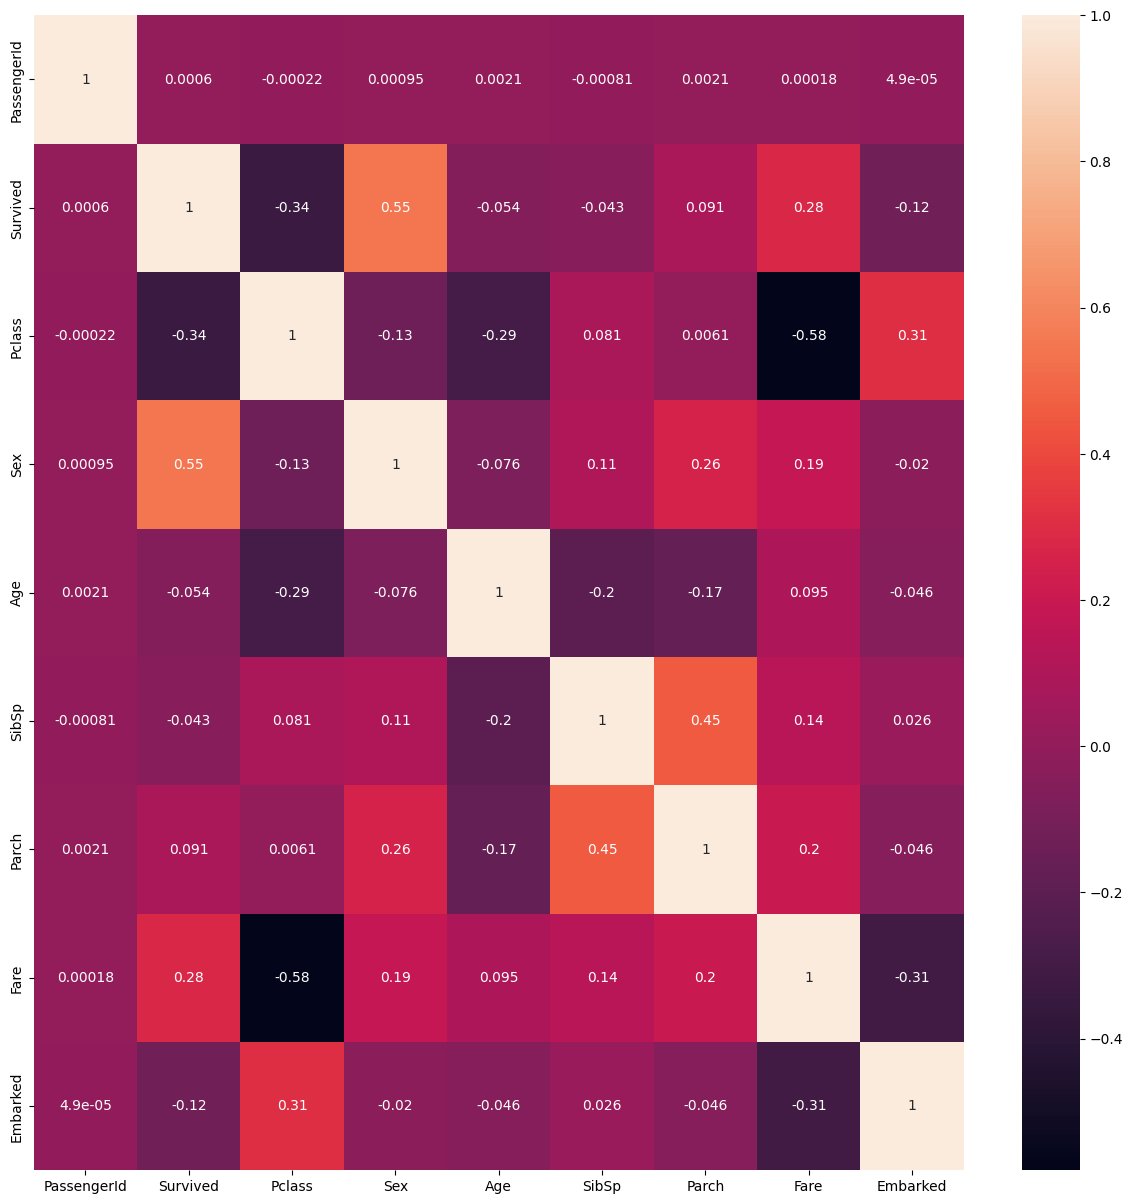

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Survived', ylabel='count'>

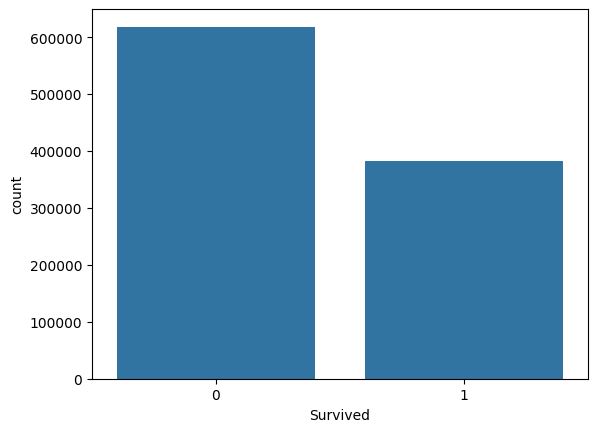

In [17]:
sns.countplot(x=df['Survived'])

# Model Training

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [21]:
def func(x,w,b):
  return 1/(1+np.exp(-(np.dot(x,w)+b)))

In [22]:
def compute_gd(x, y, w, b):
    m = x.shape[0]
    y_pred = func(x, w, b)
    error = y_pred - y
    w_grad = np.dot(x.T, error) / m
    b_grad = np.sum(error) / m
    return w_grad, b_grad

In [23]:
def gradient(x,y,w,b,iters,lr):
  for i in range(iters):
    w_gd,b_gd=compute_gd(x,y,w,b)
    w-=lr*w_gd
    b-=lr*b_gd
  return w,b

In [24]:
lr=0.05
iters=1000
w=np.zeros(x_train.shape[1])
b=0
w,b=gradient(x_train,y_train,w,b,iters,lr)
print("Weights:",w)
print("Bias:",b)

Weights: [ 0.00342245 -0.74501229  1.334358   -0.38859341 -0.39830746 -0.09784924
  0.27768356 -0.06610191]
Bias: -0.6396119031555898


# Testing

In [25]:
y_pred=func(x_train,w,b)
y_pred=np.where(y_pred>=0.5,1,0)
score=accuracy_score(y_pred,y_train)
cm=confusion_matrix(y_pred,y_train)
print('Accuracy:',score)
print('Confusion Matrix:\n',cm)
print(classification_report(y_pred,y_train))

Accuracy: 0.80279
Confusion Matrix:
 [[427205  90501]
 [ 67267 215027]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84    517706
           1       0.70      0.76      0.73    282294

    accuracy                           0.80    800000
   macro avg       0.78      0.79      0.79    800000
weighted avg       0.81      0.80      0.80    800000



In [26]:
y_pred=func(x_test,w,b)
y_pred=np.where(y_pred>=0.5,1,0)
score=accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)
print('Accuracy:',score)
print('Confusion Matrix:\n',cm)
print(classification_report(y_pred,y_test))

Accuracy: 0.801625
Confusion Matrix:
 [[106854  22682]
 [ 16993  53471]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84    129536
           1       0.70      0.76      0.73     70464

    accuracy                           0.80    200000
   macro avg       0.78      0.79      0.79    200000
weighted avg       0.81      0.80      0.80    200000



# Direct Method

In [29]:
logistic=LogisticRegression()
param_dist = {
    'class_weight': [{0: y, 1: w} for w in [1, 10, 50, 100] for y in [1, 10, 50, 100]],
    'penalty': ['l1', 'l2'],
    'C': uniform(0.001, 1000),  # Sampling from a continuous uniform distribution
    'solver': ['liblinear', 'saga']
}
random_search = RandomizedSearchCV(logistic, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x783c2a6db580>,
                                        'class_weight': [{0: 1, 1: 1},
                                                         {0: 10, 1: 1},
                                                         {0: 50, 1: 1},
                                                         {0: 100, 1: 1},
                                                         {0: 1, 1: 10},
                                                         {0: 10, 1: 10},
                                                         {0: 50, 1: 10},
                                                         {0: 100, 1: 10},
                                                         {0: 1, 1: 50},
                                                         {0: 10, 1: 50},
                                                         {0: 50, 1: 50},
                                                         {0: 100, 1: 50},
                                                         {0: 1, 1: 100},
                                                         {0: 10, 1: 100},
                                                         {0: 50, 1: 100},
                                                         {0: 100, 1: 100}],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42)

**As the size of the Dataset is very large, it is taking time for RandomizedSearchCV or GridSearchCV to find the best parameters from given parameters**

In [31]:
print("Best parameters:", random_search.best_params_)
print("Best cross-validated score:", random_search.best_score_)

Best parameters: {'C': 729.0081680409872, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validated score: 0.80260625


In [32]:
y_predict=random_search.predict(x_test)
y_predict

array([0, 1, 0, ..., 0, 1, 0])

In [33]:
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print('accuracy',score)
print(cm)
print(classification_report(y_test,y_pred))

accuracy 0.801625
[[106854  16993]
 [ 22682  53471]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84    123847
           1       0.76      0.70      0.73     76153

    accuracy                           0.80    200000
   macro avg       0.79      0.78      0.79    200000
weighted avg       0.80      0.80      0.80    200000

